In [8]:
##################################
### Import the usual libraries ###
##################################

### Other
import warnings
warnings.filterwarnings('ignore')

### Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 30})

import numpy as np
import astropy
from astropy.io import fits
from astropy.table import Table
from scipy.interpolate import InterpolatedUnivariateSpline
import extinction as extinction

def mad(dat): #median absolute deviation
    return np.median(np.absolute(dat - np.median(dat)))

In [13]:
# ### GCS Data
# gcs = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/allStar-r13-l33-58932beta_apa_dist_galvel_gc.fits.gz')
# cln = np.where((gcs['FE_H']>-9999.0)&(gcs['AK_TARG']>-9999.0)&(gcs['LOGG']>0.0)&(gcs['M_H_ERR']>-90.0)&
#                 (gcs['C_FE']>-9999.0)&(gcs['N_FE']>-9999.0))
# gcs = Table(gcs[cln])

# ### Find Cluster with more than one star

# idx = []
# for i in range(len(np.unique(gcs['CLUSTER']))):
#     idx.append(np.squeeze(np.where(gcs['CLUSTER']==np.unique(gcs['CLUSTER'])[i])))

# for i in range(len(idx)):
#     try:
#         len(idx[i])
#     except:
#         print('bad: ',i)
        
# good_names = []
# for i in np.asarray(idx)[np.delete(np.asarray(list(range(len(idx)))),[24,27,37])]:
#     if len(i)>10:
#         good_names.append(gcs['CLUSTER'][i][0])

# print(good_names)

# good_clus = np.where((gcs['CLUSTER']=='47Tuc')|(gcs['CLUSTER']=='M10')|(gcs['CLUSTER']=='M107')|
#                      (gcs['CLUSTER']=='M12')|(gcs['CLUSTER']=='M13')|(gcs['CLUSTER']=='M19')|
#                      (gcs['CLUSTER']=='M2')|(gcs['CLUSTER']=='M22')|(gcs['CLUSTER']=='M3')|
#                      (gcs['CLUSTER']=='M4')|(gcs['CLUSTER']=='M5')|(gcs['CLUSTER']=='M53')|
#                      (gcs['CLUSTER']=='M54')|(gcs['CLUSTER']=='M55')|(gcs['CLUSTER']=='M71')|
#                      (gcs['CLUSTER']=='M79')|(gcs['CLUSTER']=='NGC1851')|(gcs['CLUSTER']=='NGC2808')|
#                      (gcs['CLUSTER']=='NGC288')|(gcs['CLUSTER']=='NGC3201')|(gcs['CLUSTER']=='NGC362')|
#                      (gcs['CLUSTER']=='NGGC6388')|(gcs['CLUSTER']=='NGC6397')|(gcs['CLUSTER']=='NGC6752')|
#                      (gcs['CLUSTER']=='omegaCen'))

# gcs = gcs[good_clus]

In [10]:
# LMC
# lmc = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/lmc_rgbmembers.r13-l33-58672.fits.gz')
# cln = np.where((lmc['FE_H']>-9999.0)&(lmc['AK_TARG']>-100.0)&(lmc['LOGG']>=0.0)&
#                 (lmc['M_H_ERR']>-100.0)&(lmc['C_FE']>-100.0)&(lmc['N_FE']>-100.0))
# lmc = lmc[cln]

# LMC DR 17 data
lmc = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/lmc_rgbmembers.dr17_qacuts.fits.gz',1)
lmc = Table(lmc)

allstar = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/allStar-dr17-synspec.fits.gz',1)

In [11]:
from astropy.io import ascii
allStarID = Table()
allStarID['APOGEE_ID'] = allstar['APOGEE_ID']
allStarID['DR3_SOURCE_ID'] = allstar['GAIAEDR3_SOURCE_ID']
allStarID.remove_row(0)
ascii.write(allStarID,'allStarID.dat')

In [14]:
gdr2 = fits.getdata('/Users/joshuapovick/Desktop/Research/gaia/allStarGaiaDR2-result.fits.gz',1)
gedr3 = fits.getdata('/Users/joshuapovick/Desktop/Research/gaia/allStarGaiaEDR3-result.fits.gz',1)

In [18]:
gdr2.columns

ColDefs(
    name = 'solution_id'; format = 'K'
    name = 'designation'; format = '28A'
    name = 'source_id'; format = 'K'
    name = 'random_index'; format = 'K'
    name = 'ref_epoch'; format = 'D'; unit = 'yr'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'ra_error'; format = 'D'; unit = 'mas'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'dec_error'; format = 'D'; unit = 'mas'
    name = 'parallax'; format = 'D'; unit = 'mas'
    name = 'parallax_error'; format = 'D'; unit = 'mas'
    name = 'parallax_over_error'; format = 'E'
    name = 'pmra'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmra_error'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec_error'; format = 'D'; unit = 'mas.yr**-1'
    name = 'ra_dec_corr'; format = 'E'
    name = 'ra_parallax_corr'; format = 'E'
    name = 'ra_pmra_corr'; format = 'E'
    name = 'ra_pmdec_corr'; format = 'E'
    name = 'dec_parallax_corr'; format = 'E'
    na

In [21]:
print(len(np.unique(gdr2['col2'])))
print(len(gdr2['col2']))
print(len(np.unique(gdr2['col2']))/len(gdr2['col2']))

624270
750476
0.8318320639167675


In [25]:
from tqdm import tqdm_notebook

In [72]:
uniqs = []
for i in tqdm_notebook(range(len(lmc))):
    source_idx = np.where(gdr2['col1']==lmc['APOGEE_ID'][i])
    if np.squeeze(source_idx).size == 1:
        uniqs.append(i)
        
gcut = []
for i in tqdm_notebook(lmc['APOGEE_ID'][uniqs]):
    gcut.append(np.squeeze(np.where(gdr2['col1']==i)))
    
gct = []
for i in range(len(gcut)):
    gct.append(int(gcut[i]))
    
gdr2 = gdr2[gct]

In [80]:
star = np.where(lmc['APOGEE_ID']==gdr2['col1'][0])

np.sqrt((lmc['RA'][star]-gdr2['ra'][0])**2+(lmc['DEC'][star]-gdr2['dec'][0])**2)

for i in (gdr2['col2'] == gdr2['source_id']):
    if i == False:
        print(i)

In [102]:
gdr2.columns

ColDefs(
    name = 'solution_id'; format = 'K'
    name = 'designation'; format = '28A'
    name = 'source_id'; format = 'K'
    name = 'random_index'; format = 'K'
    name = 'ref_epoch'; format = 'D'; unit = 'yr'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'ra_error'; format = 'D'; unit = 'mas'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'dec_error'; format = 'D'; unit = 'mas'
    name = 'parallax'; format = 'D'; unit = 'mas'
    name = 'parallax_error'; format = 'D'; unit = 'mas'
    name = 'parallax_over_error'; format = 'E'
    name = 'pmra'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmra_error'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec_error'; format = 'D'; unit = 'mas.yr**-1'
    name = 'ra_dec_corr'; format = 'E'
    name = 'ra_parallax_corr'; format = 'E'
    name = 'ra_pmra_corr'; format = 'E'
    name = 'ra_pmdec_corr'; format = 'E'
    name = 'dec_parallax_corr'; format = 'E'
    na

In [104]:
ateffs = []
aloggs = []
afehs = []
gteffs = []
gagvals = []
gebprps = []

for i in tqdm_notebook(range(len(gdr2))):
    apo = np.where(lmc['APOGEE_ID']==gdr2['col1'][i])
    ateffs.append(lmc[apo]['TEFF'])
    aloggs.append(lmc[apo]['LOGG'])
    afehs.append(lmc[apo]['FE_H'])
    gteffs.append(gdr2['teff_val'][i])
    gagvals.append(gdr2['a_g_val'][i])
    gebprps.append(gdr2['e_bp_min_rp_val'][i])
    
print(len(ateffs))
print(len(gteffs))


5505
5505


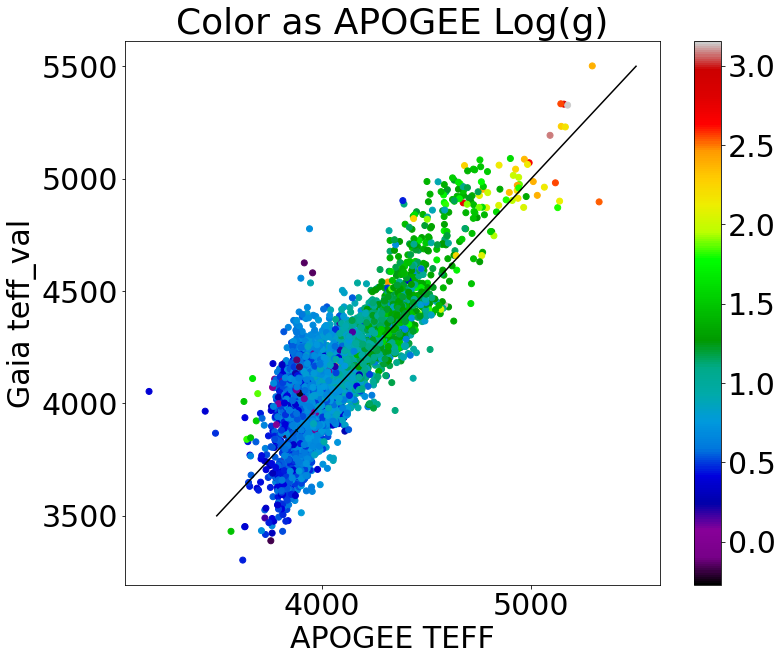

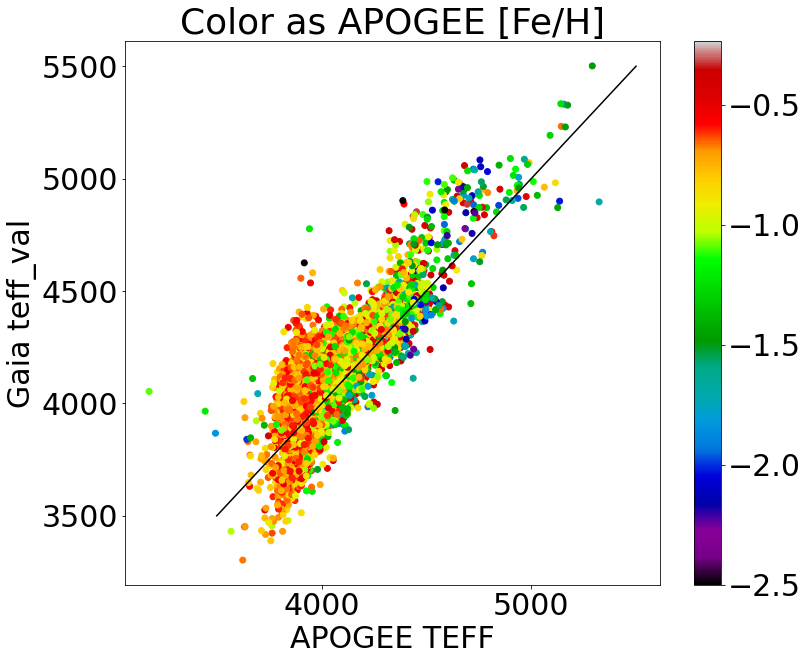

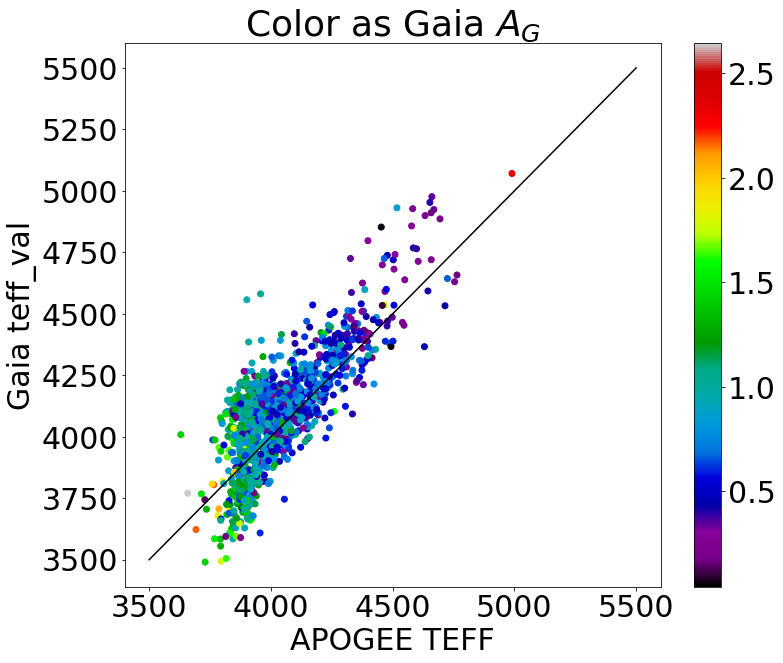

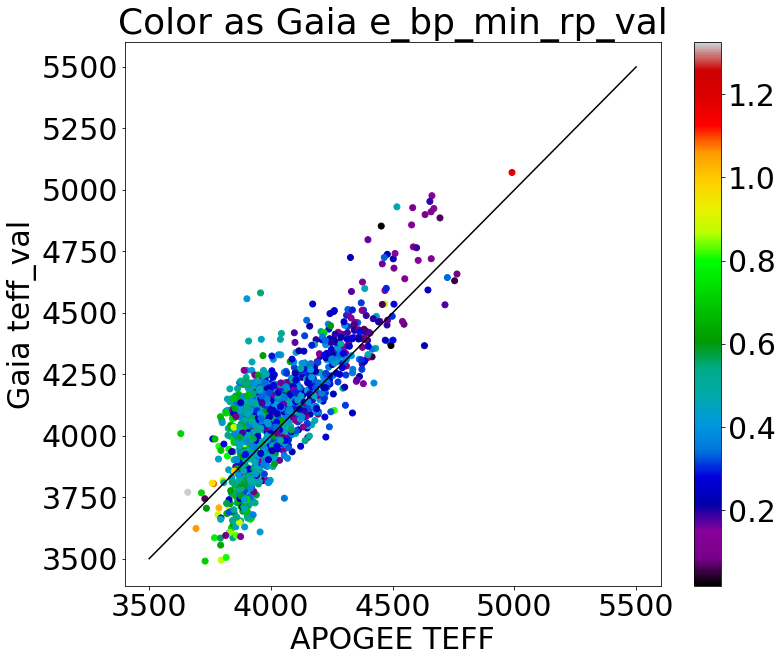

In [107]:
plt.figure(figsize=[12,10])
plt.scatter(ateffs,gteffs,c=aloggs,cmap='nipy_spectral')
plt.colorbar()
plt.plot([3500,5500],[3500,5500],c='k')
plt.title('Color as APOGEE Log(g)')
plt.xlabel(r'APOGEE TEFF')
plt.ylabel(r'Gaia teff_val')
plt.savefig('teff_w_apo_logg.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize=[12,10])
plt.scatter(ateffs,gteffs,c=afehs,cmap='nipy_spectral')
plt.colorbar()
plt.plot([3500,5500],[3500,5500],c='k')
plt.title('Color as APOGEE [Fe/H]')
plt.xlabel(r'APOGEE TEFF')
plt.ylabel(r'Gaia teff_val')
plt.savefig('teff_w_apo_feh.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize=[12,10])
plt.scatter(ateffs,gteffs,c=gagvals,cmap='nipy_spectral')
plt.colorbar()
plt.plot([3500,5500],[3500,5500],c='k')
plt.title('Color as Gaia $A_G$')
plt.xlabel(r'APOGEE TEFF')
plt.ylabel(r'Gaia teff_val')
plt.savefig('teff_w_gaia_ag.pdf',bbox_inches='tight')
plt.show()

plt.figure(figsize=[12,10])
plt.scatter(ateffs,gteffs,c=gebprps,cmap='nipy_spectral')
plt.colorbar()
plt.plot([3500,5500],[3500,5500],c='k')
plt.title('Color as Gaia e_bp_min_rp_val')
plt.xlabel(r'APOGEE TEFF')
plt.ylabel(r'Gaia teff_val')
plt.savefig('teff_w_gaia_ebprp.pdf',bbox_inches='tight')
plt.show()

In [95]:
gdr2.columns

ColDefs(
    name = 'solution_id'; format = 'K'
    name = 'designation'; format = '28A'
    name = 'source_id'; format = 'K'
    name = 'random_index'; format = 'K'
    name = 'ref_epoch'; format = 'D'; unit = 'yr'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'ra_error'; format = 'D'; unit = 'mas'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'dec_error'; format = 'D'; unit = 'mas'
    name = 'parallax'; format = 'D'; unit = 'mas'
    name = 'parallax_error'; format = 'D'; unit = 'mas'
    name = 'parallax_over_error'; format = 'E'
    name = 'pmra'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmra_error'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec_error'; format = 'D'; unit = 'mas.yr**-1'
    name = 'ra_dec_corr'; format = 'E'
    name = 'ra_parallax_corr'; format = 'E'
    name = 'ra_pmra_corr'; format = 'E'
    name = 'ra_pmdec_corr'; format = 'E'
    name = 'dec_parallax_corr'; format = 'E'
    na

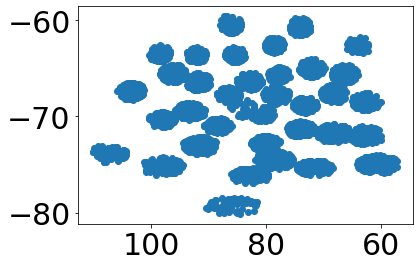

In [78]:
plt.scatter(gdr2['ra'],gdr2['dec'])
plt.gca().invert_xaxis()

In [109]:
gdr2.columns

ColDefs(
    name = 'solution_id'; format = 'K'
    name = 'designation'; format = '28A'
    name = 'source_id'; format = 'K'
    name = 'random_index'; format = 'K'
    name = 'ref_epoch'; format = 'D'; unit = 'yr'
    name = 'ra'; format = 'D'; unit = 'deg'
    name = 'ra_error'; format = 'D'; unit = 'mas'
    name = 'dec'; format = 'D'; unit = 'deg'
    name = 'dec_error'; format = 'D'; unit = 'mas'
    name = 'parallax'; format = 'D'; unit = 'mas'
    name = 'parallax_error'; format = 'D'; unit = 'mas'
    name = 'parallax_over_error'; format = 'E'
    name = 'pmra'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmra_error'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec'; format = 'D'; unit = 'mas.yr**-1'
    name = 'pmdec_error'; format = 'D'; unit = 'mas.yr**-1'
    name = 'ra_dec_corr'; format = 'E'
    name = 'ra_parallax_corr'; format = 'E'
    name = 'ra_pmra_corr'; format = 'E'
    name = 'ra_pmdec_corr'; format = 'E'
    name = 'dec_parallax_corr'; format = 'E'
    na

(array([1.000e+00, 5.000e+00, 2.690e+02, 3.394e+03, 1.177e+03, 8.370e+02,
        3.220e+02, 7.800e+01, 2.900e+01, 1.200e+01]),
 array([0.630377  , 0.6729723 , 0.7155676 , 0.7581629 , 0.80075824,
        0.8433535 , 0.88594884, 0.92854416, 0.9711395 , 1.0137348 ,
        1.0563301 ], dtype=float32),
 <a list of 10 Patch objects>)

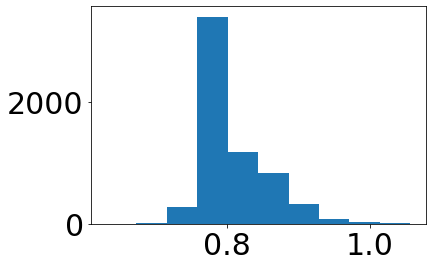

In [4]:
plt.hist(lmc['TEFF']/5040)

In [16]:
import extinction as extinct

def gaia_rglaw(teff,ebprp,mag):
    '''
    Calculate the extinction according to that used by Gaia
    
    https://www.cosmos.esa.int/web/gaia/edr3-extinction-law
    
    Inputs:
    ------ 
        teff: temperature of star
        ebprp: [float] measured Gaia E(BP-RP)
        mag: [str] Gaia band of interest
    
    Output:
    ------
        amag: extinction in the mag band
    '''
    
    ### Use Cardelli et al. 1989 to get A0
    leff = {'BP':0.5387,'G':0.6419,'RP':0.7667,'J':1.2345,'H':1.6393,'K':2.1757} # mircons
    tnorm = teff/5040.
    
    if mag = 'BP':
        a0 = extinct.cardelli_alebv('BP',3.1)/extinct.cardelli_e12ebv('BP','RP',3.1)*ebprp # A0 = 3.1*E(B-V)
        amag = (0.701997072298603+(0.490866299480625*tnorm)+(-0.164808457543591*tnorm**2)+ 
                (0.0170922494342349*tnorm**3)+(0.00289871460851645*a0)+(0.000425850523466046*a0**2)+ 
                (-1.20366204386936E-05*a0**3)+(-0.023177965407382*a0*tnorm)+(0.0051461571124259*a0*tnorm**2)+
                (0.000222767475712585*tnorm*a0**2))*a0
        
        return amag
    
    if mag = 'RP':
        a0 = extinct.cardelli_alebv('RP',3.1)/extinct.cardelli_e12ebv('BP','RP',3.1)*ebprp # A0 = 3.1*E(B-V)
        amag = (0.397757193443918+(0.47830422684147*tnorm)+(-0.298201519568948*tnorm**2)+ 
                (0.0631162856810166*tnorm**3)+(-0.00417918495688091*a0)+(6.38932013394025E-05*a0**2)+
                (1.61356747065524E-06*a0**3)+(-0.0030271096995944*a0*tnorm)+(0.000947582042228708*a0*tnorm**2)+
                (-1.74529998636095E-05*tnorm*a0**2))*a0
        
        return amag
        
    if mag = 'J':
        a0 = extinct.cardelli_alebv('J',3.1)/extinct.cardelli_e12ebv('BP','RP',3.1)*ebprp # A0 = 3.1*E(B-V)
        amag = (0.332935353596665+(0.00718635963856921*tnorm)+(-0.00169547556488427*tnorm**2)+ 
                (-1.75260900328751E-05*tnorm**3)+(-0.000135442165788462*a0)+(3.2704960118855E-07*a0**2)+
                (2.32045629925236E-09*a0**3)+(-2.32956015554387E-05*a0*tnorm)+(6.5953637769895E-06*a0*tnorm**2)+
                (-8.2710717573809E-08*tnorm*a0**2))*a0
        
        return amag
    
    if mag = 'H':
        a0 = extinct.cardelli_alebv('H',3.1)/extinct.cardelli_e12ebv('BP','RP',3.1)*ebprp # A0 = 3.1*E(B-V)
        amag = (0.248021433372677+(0.0124879435361896*tnorm)+(-0.00743061342278086*tnorm**2)+ 
                (0.00147104922489336*tnorm**3)+(-6.18256432274496E-05*a0)+(3.03867884218629E-08*a0**2)+
                (7.32552035881748E-10*a0**3)+(-7.58455783400754E-06*a0*tnorm)+(2.18577169747426E-06*a0*tnorm**2)+
                (-1.77718326547873E-08*tnorm*a0**2))*a0
        
        return amag
    
    if mag = 'K':
        a0 = extinct.cardelli_alebv('K',3.1)/extinct.cardelli_e12ebv('BP','RP',3.1)*ebprp # A0 = 3.1*E(B-V)
        amag = (0.193851022706578+(0.00028299693255987*tnorm)+(-0.000172741364522645*tnorm**2)+ 
                (3.94408127493511E-05*tnorm**3)+(-2.73437022213536E-05*a0)+(1.03538619676723E-08*a0**2)+
                (1.22776723809929E-10*a0**3)+(-2.23886334385037E-06*a0*tnorm)+(6.6616716780043E-07*a0*tnorm**2)+
                (-8.06457376224959E-10*tnorm*a0**2))*a0
    
        return amag

In [15]:
lmc['APOGEE_ID'][0]

'2M05135760-6927482'

(array([3.954e+03, 3.900e+02, 1.390e+02, 2.400e+01, 1.300e+01, 9.000e+00,
        1.000e+00, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([1.7441064e-07, 5.8273841e-02, 1.1654751e-01, 1.7482118e-01,
        2.3309484e-01, 2.9136851e-01, 3.4964219e-01, 4.0791586e-01,
        4.6618950e-01, 5.2446318e-01, 5.8273685e-01], dtype=float32),
 <a list of 10 Patch objects>)

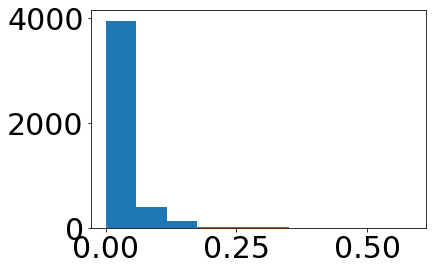

In [6]:
plt.hist(lmc['AK_TARG'])

In [7]:
# from astroquery.gaia import Gaia

In [8]:
# tables = Gaia.load_tables(only_names=True)

In [9]:
# for table in tables:
#     print(table.name)

In [10]:
# table_metadata = Gaia.load_table('gaiadr2.gaia_source')
# table_metadata

In [11]:
# for column in table_metadata.columns:
#     print(column.name)

In [12]:
# query1 = """SELECT TOP 1000
# source_id, teff_val 
# FROM gaiadr2.gaia_source
# """

# job1 = Gaia.launch_job(query1)
# results1 = job1.get_results()

(array([9.000e+00, 5.200e+01, 5.680e+02, 1.212e+03, 2.077e+03, 1.854e+03,
        3.080e+02, 3.200e+01, 1.000e+01, 2.000e+00]),
 array([0.8197994, 1.0398695, 1.2599396, 1.4800097, 1.7000797, 1.9201498,
        2.14022  , 2.36029  , 2.58036  , 2.80043  , 3.0205002],
       dtype=float32),
 <a list of 10 Patch objects>)

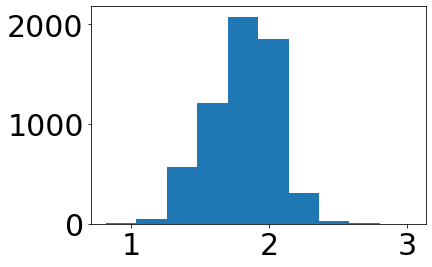

In [14]:
plt.hist(lmc['GAIAEDR3_BPMAG']-lmc['GAIAEDR3_RPMAG'])

In [22]:
lmcdr2 = fits.getdata('/Users/joshuapovick/Desktop/Research/fits/lmc_rgbmembers.r13-l33-58672.fits.gz',)

In [23]:
lmcdr2.columns

ColDefs(
    name = 'APSTAR_ID'; format = '46A'
    name = 'TARGET_ID'; format = '39A'
    name = 'ASPCAP_ID'; format = '56A'
    name = 'FILE'; format = '34A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '6A'
    name = 'LOCATION_ID'; format = 'J'
    name = 'FIELD'; format = '5A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'APOGEE2_TARGET1'; format = 'J'
    name = 'APOGEE2_TARGET2'; format = 'J'
    name = 'APOGEE2_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '105A'
    name = 'SURVEY'; format = '8A'
    name = 'PROGRAMNAME'; format = '18A'
    name

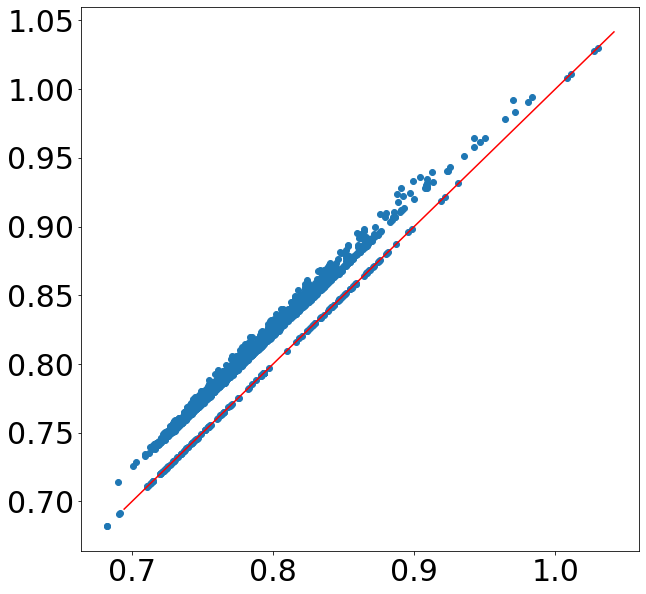

In [30]:
plt.figure(figsize=[10,10])
plt.scatter(lmcdr2['TEFF_SPEC']/5040,lmcdr2['TEFF']/5040)
plt.plot([3500/5040,5250/5040],[3500/5040,5250/5040],c='r')